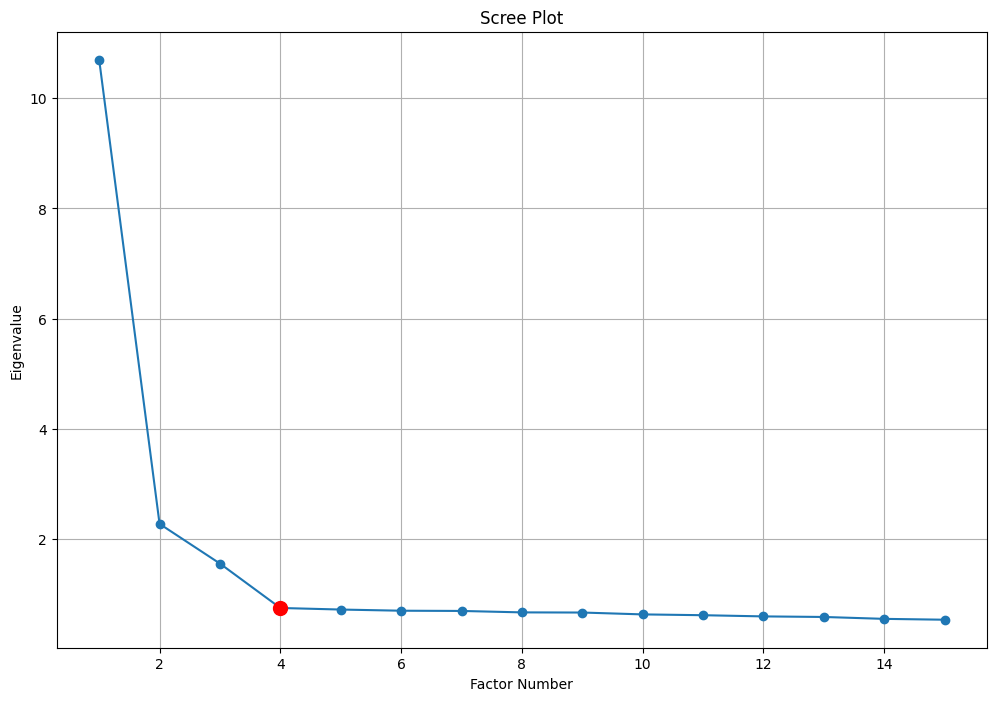

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

# Generate synthetic data with 15 variables and 3 clear factors
np.random.seed(42)
n_samples = 1000
n_features = 15
n_factors = 3

# Create factor loadings
loadings = np.random.rand(n_features, n_factors)
factors = np.random.randn(n_samples, n_factors)
noise = np.random.randn(n_samples, n_features) * 0.8
data = np.dot(factors, loadings.T) + noise

# Convert to DataFrame
df = pd.DataFrame(data, columns=[f'Var{i+1}' for i in range(n_features)])

# Perform Factor Analysis
fa = FactorAnalysis(n_components=n_features)
fa.fit(df)

# Calculate eigenvalues from the noise covariance matrix
eigenvalues = np.linalg.eigvals(np.cov(df, rowvar=False))

# Sort eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Plot the scree plot
plt.figure(figsize=(12, 8))
plt.plot(range(1, n_features + 1), eigenvalues_sorted, marker='o', label='Eigenvalues')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid(True)

# Identifying the elbow point
elbow_point = 4
plt.scatter(elbow_point, eigenvalues_sorted[elbow_point - 1], color='red', s=100, zorder=5)  # Circle the elbow point

plt.show()
